In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Read the file
df=pd.read_csv('/content/sample_data/project1_df (1).csv')

In [7]:
#To visualize top 5 rows
df.head()


,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [8]:
#To check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [9]:
#To check if there are any null values
df.isna()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,False,False,False,False,False,False,False,False,False,False,False,False,False
54996,False,False,False,False,False,False,False,False,False,False,False,False,False
54997,False,False,False,False,False,False,False,False,False,False,False,False,False
54998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#To check if there are any null values as a sum
df.isna().sum()

# no need to remove missing values as these are customers who choose not to avail discount.
# you can always replcae and rename it to 'No Discount'

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


In [11]:
# To view the statistics
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [12]:
#Identify unique values in each categorical columns
col_cat=['Location','Purchase Method','Discount Name']
{col : df[col].unique() for col in col_cat }

{'Location': array(['Ahmedabad', 'Bangalore', 'Delhi', 'Other', 'Chennai', 'Dehradun',
        'Pune', 'Hyderabad', 'Mumbai', 'Jaipur', 'Lucknow', 'Kolkata',
        'Srinagar', 'Varanasi'], dtype=object),
 'Purchase Method': array(['Credit Card', 'Debit Card', 'PhonePe UPI', 'Google Pay UPI',
        'Net Banking', 'Cash on Delivery', 'Paytm UPI',
        'International Card'], dtype=object),
 'Discount Name': array(['FESTIVE50', 'SEASONALOFFER21', nan, 'WELCOME5', 'SAVE10',
        'NEWYEARS'], dtype=object)}

# **Business Problems to Address:**

**Which age group contributes to the most purchases?**

In [13]:
agegroup_summary=df.groupby('Age Group').agg(totalrevenue=('Net Amount','sum'),# Sum of Net Amount
                                            totalpurchases=('CID','count')# Count of purchases
                                            ) .reset_index()



In [14]:
agegroup_summary.head()

,Age Group,totalrevenue,totalpurchases
0,18-25,4.680492e+07,16431
1,25-45,6.393331e+07,22010
2,45-60,3.168380e+07,11104
3,60 and above,7.747873e+06,2684
4,under 18,8.007341e+06,2771


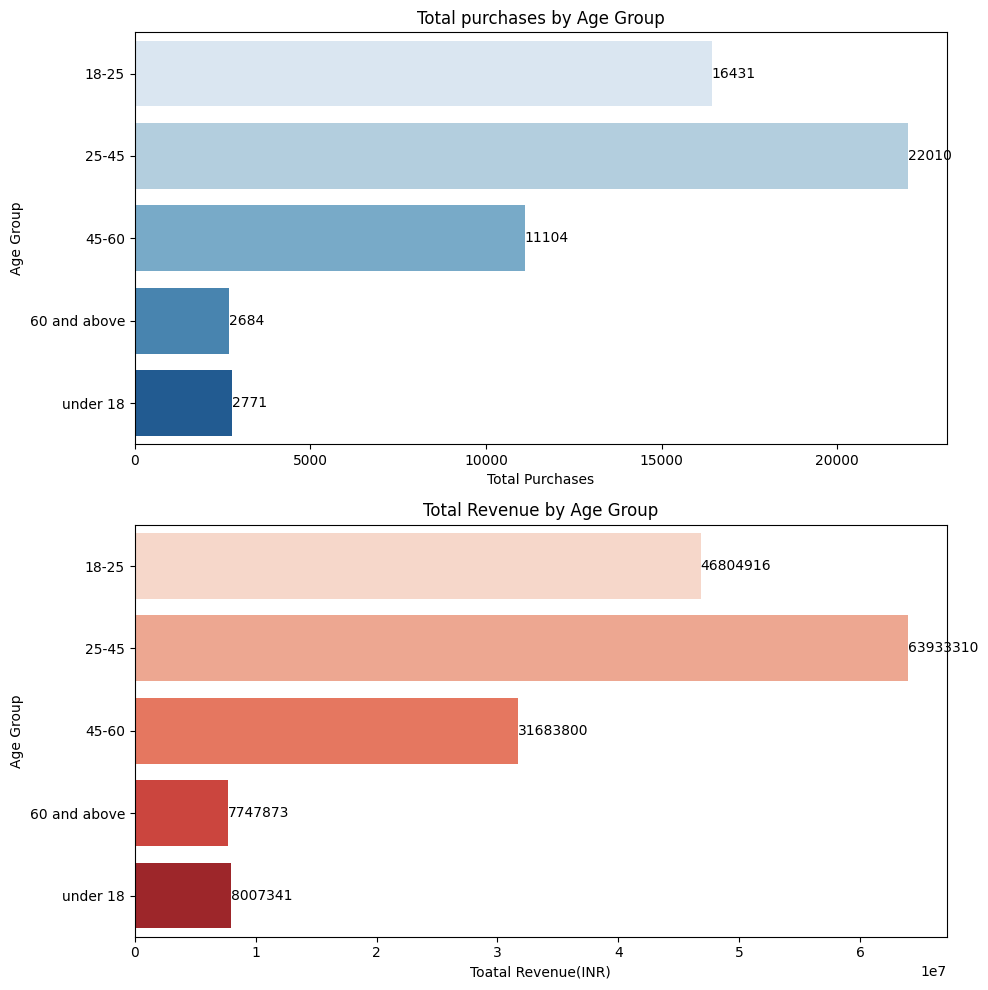

In [15]:
fig, ax =plt.subplots(2,1, figsize = (10,10))

#Bar chart for Total Purchases
sns.barplot(x='totalpurchases',y='Age Group',data=agegroup_summary,ax=ax[0],hue='Age Group',palette='Blues')

ax[0].set_title('Total purchases by Age Group')
ax[0].set_xlabel('Total Purchases')
ax[0].set_ylabel('Age Group')

#To display Counts
for bars in ax[0].containers:
  ax[0].bar_label(bars)


#Bar chart for Total Revenue
sns.barplot(x='totalrevenue',y='Age Group',data=agegroup_summary,ax=ax[1],hue='Age Group',palette='Reds')
ax[1].set_title('Total Revenue by Age Group')
ax[1].set_xlabel('Toatal Revenue(INR)')
ax[1].set_ylabel('Age Group')

#To display Revenue
for bars in ax[1].containers:
  ax[1].bar_label(bars,fmt='%.0f')



# Show the plots
plt.tight_layout()
plt.show()

**Which time of the year are the sales highest and lowest?**

In [16]:
#Convert date column to date time format

df['Purchase Date']= pd.to_datetime(df['Purchase Date'])

# Step 2: Extract Month
df['Month'] = df['Purchase Date'].dt.month  # For month
# or, to extract season:

df['Season'] = df['Purchase Date'].dt.month % 12 // 3 + 1
# 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Step 3: Aggregate sales data by Month/Season
monthly_sales1 = df.groupby('Month')['Net Amount'].sum().reset_index()
monthly_sales2 = df.groupby('Season')['Net Amount'].sum().reset_index()


<ipython-input-16-b4a838481985>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Purchase Date']= pd.to_datetime(df['Purchase Date'])


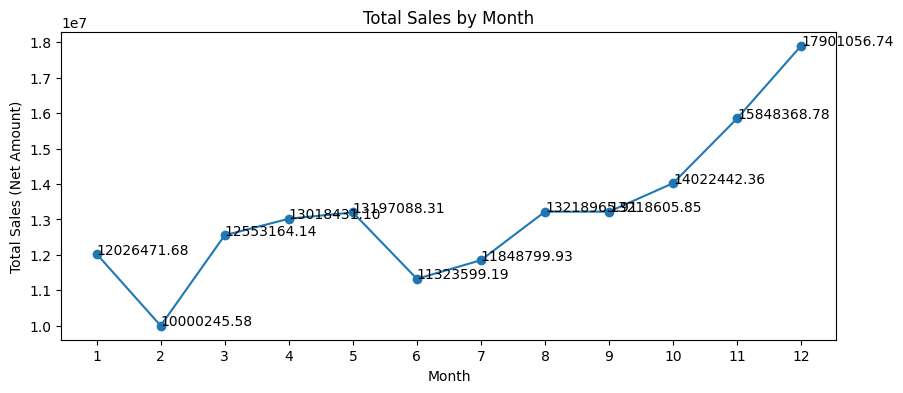

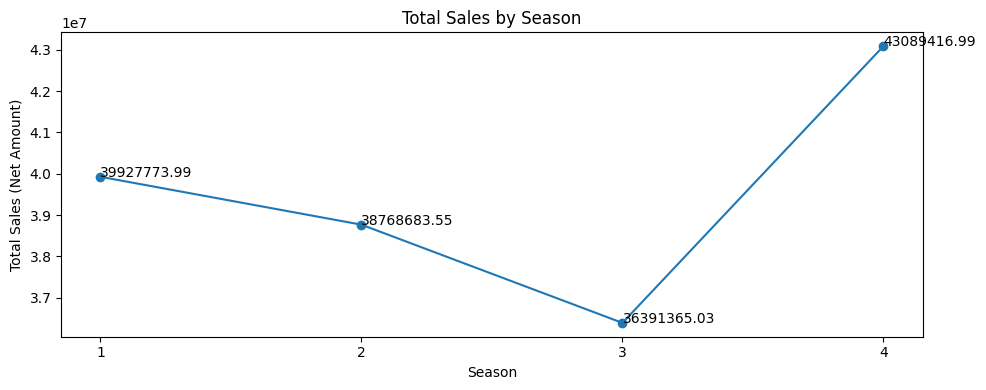

In [17]:
# Step 4: Visualize with a line chart
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales1['Month'], monthly_sales1['Net Amount'], marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (Net Amount)')
plt.xticks(monthly_sales1['Month'])  # Show all months on the x-axis

# Display values on the line chart (Monthly Sales)
for x, y in zip(monthly_sales1['Month'], monthly_sales1['Net Amount']):
    plt.text(x, y, f'{y:.2f}')


plt.figure(figsize=(10, 4))
plt.plot(monthly_sales2['Season'], monthly_sales2['Net Amount'], marker='o')
plt.title('Total Sales by Season')
plt.xlabel('Season') # Seasons being 1: Winter, 2: Spring, 3: Summer, 4: Fall
plt.ylabel('Total Sales (Net Amount)')
plt.xticks(monthly_sales2['Season'])  # Show all months on the x-axis

# Display values on the line chart (Seasonal Sales)
for x, y in zip(monthly_sales2['Season'], monthly_sales2['Net Amount']):
    plt.text(x, y, f'{y:.2f}')


plt.tight_layout()
plt.show()

**Which product category performs the most?**

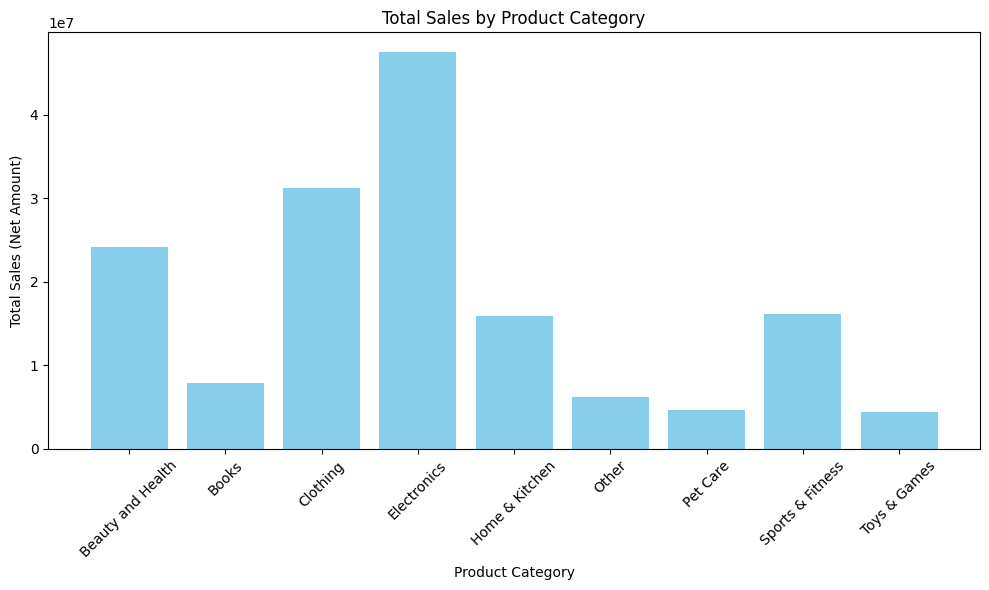

In [36]:
#Group by product category and netamount
prod_cat_sales = df.groupby('Product Category')['Net Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(prod_cat_sales['Product Category'], prod_cat_sales['Net Amount'], color='skyblue')  # Use bar chart for clarity
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (Net Amount)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Does Gender have a positive correlation to purchases?**

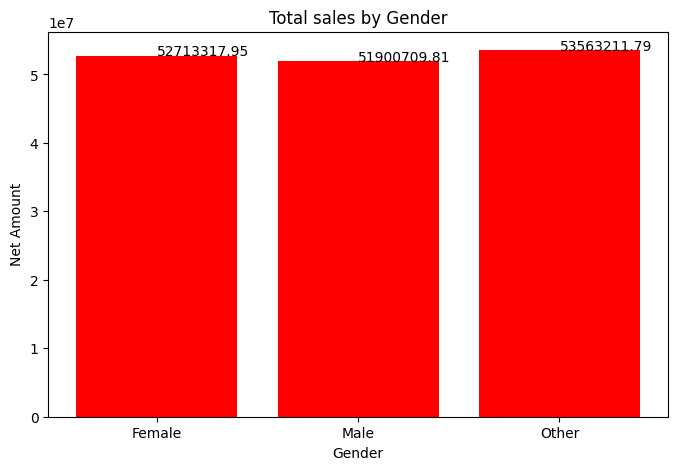

In [56]:
gendersales=df.groupby('Gender')['Net Amount'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(gendersales['Gender'],gendersales['Net Amount'],color='red')
plt.xlabel('Gender')
plt.ylabel('Net Amount')
plt.title('Total sales by Gender')


for x, y in zip(gendersales['Gender'], gendersales['Net Amount']):
    plt.text(x, y, f'{y:.2f}')


plt.show()

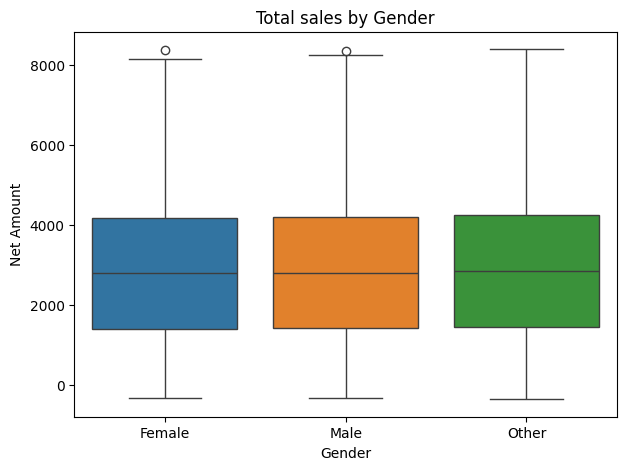

In [63]:
#Visualise purchase distribution by gender as box plot distribution
ax=plt.figure(figsize=(7,5))
sns.boxplot(x='Gender',y='Net Amount',data=df,hue='Gender')

plt.xlabel('Gender')
plt.ylabel('Net Amount')
plt.title('Total sales by Gender')
plt.show()

**Does location and purchases have a positive correlation?**

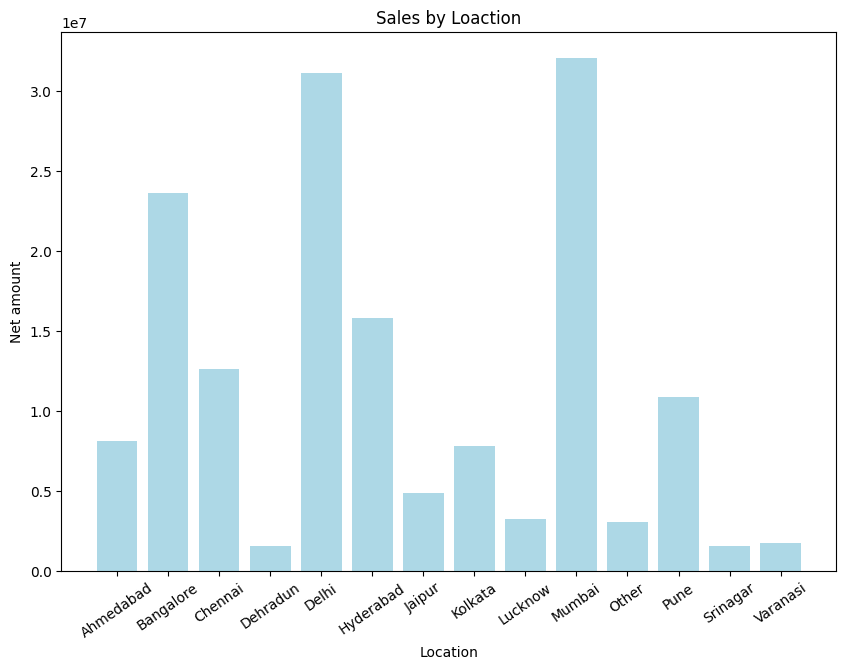

In [79]:
saleslocation=df.groupby('Location')['Net Amount'].sum().reset_index()
plt.figure(figsize=(10,7))
plt.bar(saleslocation['Location'],saleslocation['Net Amount'],color='lightblue')
plt.xlabel('Location')
plt.ylabel('Net amount')
plt.title('Sales by Loaction')
plt.xticks(rotation=35)
plt.show()


**Which age group is most responsive to discount?**

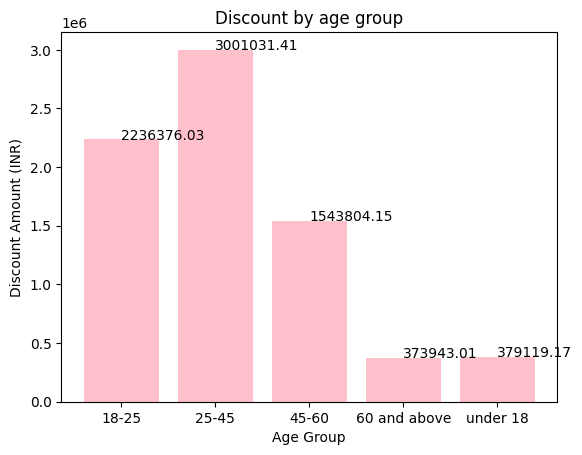

In [90]:
salesbyage=df.groupby(['Age Group'])['Discount Amount (INR)'].sum().reset_index()

plt.bar(salesbyage['Age Group'],salesbyage['Discount Amount (INR)'],color='pink')
plt.xlabel('Age Group')
plt.ylabel('Discount Amount (INR)')
plt.title('Discount by age group')


for x, y in zip(salesbyage['Age Group'], salesbyage['Discount Amount (INR)']):
    plt.text(x, y, f'{y:.2f}')


plt.show()

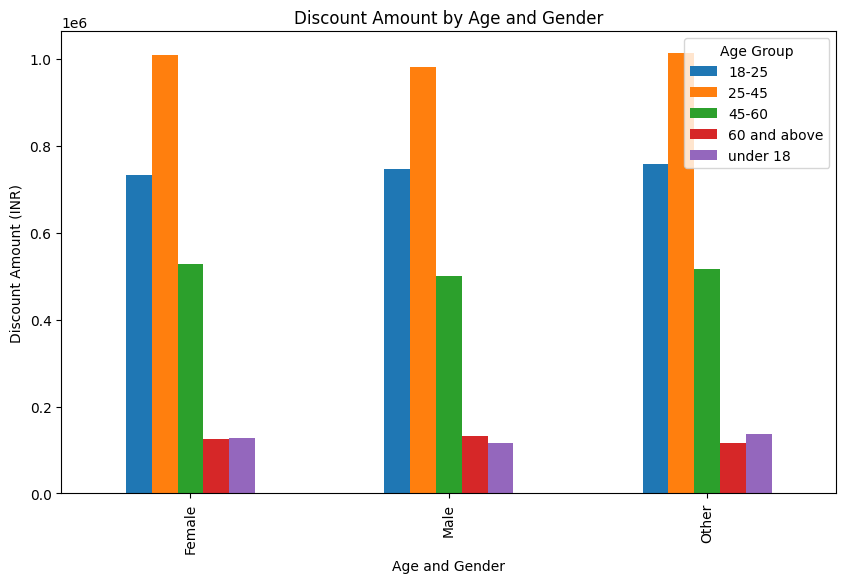

In [104]:
age=df.groupby(['Gender','Age Group'])['Discount Amount (INR)'].sum().unstack().fillna(0)
age.head()

age.plot(kind='bar',figsize=(10, 6))

plt.xlabel('Age and Gender')
plt.ylabel('Discount Amount (INR)')
plt.title('Discount Amount by Age and Gender')
plt.show()


Final Observations on the dataset

-Which age group contributes to the most purchases?
25 - 45 age group contributes to the highest net revenue as well as the highest purchases.

-Which time of the year are the sales highest and lowest?
A record high sales was observed in December and the lowest being in February.

-Which product category performs the most?
Electronics recorded the highest purchases and net revenue followed by Clothing category. Petcare products and other generic purchases were the lowest recorded.

-Does Gender have a positive correlation to purchases?
An balanced purchase distribution was observed between the gender groups.

-Does location and purchase have a positive correlation?
Mumbai, Delhi and Bangalore show the highest purchases whereas Dehradun holds the lowest purchase. Metropolitan cities showed more purchase power in comparison to rural cities.